In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fair-ai/sample_submission.csv
/kaggle/input/fair-ai/train.csv
/kaggle/input/fair-ai/test.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_train=pd.read_csv("/kaggle/input/fair-ai/train.csv")
df_test=pd.read_csv("/kaggle/input/fair-ai/test.csv")

In [4]:
df_train

,ID,LIMIT_BAL,SEX,EDUCATION,MARITAL_STATUS,AGE,INSTALLMENT_1,INSTALLMENT_2,INSTALLMENT_3,INSTALLMENT_AMT_1,INSTALLMENT_AMT_2,INSTALLMENT_AMT_3,INSTALLMENT_PAID_1,INSTALLMENT_PAID_2,INSTALLMENT_PAID_3,DEFAULT.PAYMENT.NEXT.MONTH
0,12194,220000.0,FEMALE,graduate school,MARRIED,54,1,-2,-1,0.0,0.0,788.0,0.0,788.0,0.0,0
1,7068,90000.0,FEMALE,graduate school,SINGLE,30,2,2,3,750.0,750.0,750.0,0.0,0.0,0.0,0
2,1446,80000.0,FEMALE,university,SINGLE,25,2,3,2,69602.0,67930.0,72205.0,0.0,6000.0,2700.0,0
3,318,260000.0,FEMALE,high school,MARRIED,53,1,-1,-1,0.0,165.0,526.0,165.0,526.0,452.0,0
4,13732,30000.0,FEMALE,university,SINGLE,23,0,0,0,25287.0,26501.0,30300.0,2011.0,5000.0,868.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,16350,210000.0,FEMALE,graduate school,SINGLE,37,-1,-1,-1,349.0,10128.0,19631.0,10152.0,19631.0,23906.0,1
20996,5187,230000.0,MALE,graduate school,SINGLE,39,0,0,0,38395.0,39943.0,20650.0,2500.0,2000.0,0.0,0
20997,4825,200000.0,MALE,graduate school,MARRIED,31,0,0,0,160292.0,119080.0,113723.0,6036.0,4002.0,4005.0,0
20998,29044,50000.0,FEMALE,university,MARRIED,50,0,0,0,32570.0,34713.0,39803.0,3000.0,6000.0,3000.0,0


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          21000 non-null  int64  
 1   LIMIT_BAL                   21000 non-null  float64
 2   SEX                         21000 non-null  object 
 3   EDUCATION                   21000 non-null  object 
 4   MARITAL_STATUS              21000 non-null  object 
 5   AGE                         21000 non-null  int64  
 6   INSTALLMENT_1               21000 non-null  int64  
 7   INSTALLMENT_2               21000 non-null  int64  
 8   INSTALLMENT_3               21000 non-null  int64  
 9   INSTALLMENT_AMT_1           21000 non-null  float64
 10  INSTALLMENT_AMT_2           21000 non-null  float64
 11  INSTALLMENT_AMT_3           21000 non-null  float64
 12  INSTALLMENT_PAID_1          21000 non-null  float64
 13  INSTALLMENT_PAID_2          210

In [6]:
df_train.describe()

,ID,LIMIT_BAL,AGE,INSTALLMENT_1,INSTALLMENT_2,INSTALLMENT_3,INSTALLMENT_AMT_1,INSTALLMENT_AMT_2,INSTALLMENT_AMT_3,INSTALLMENT_PAID_1,INSTALLMENT_PAID_2,INSTALLMENT_PAID_3,DEFAULT.PAYMENT.NEXT.MONTH
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,2.100000e+04,21000.000000,21000.000000
mean,14989.511667,168351.714286,35.531524,-0.011381,-0.129619,-0.164714,51601.479000,49411.493524,4.726970e+04,5733.337667,5.980440e+03,5296.636048,0.223429
std,8671.132777,130145.303418,9.234924,1.131404,1.203697,1.201243,74247.117541,71506.968881,7.006471e+04,17411.603190,2.525646e+04,18060.540666,0.416553
min,1.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-33350.000000,-6.150600e+04,0.000000,0.000000e+00,0.000000,0.000000
25%,7487.750000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,3490.000000,2898.500000,2.550750e+03,916.750000,7.827500e+02,390.000000,0.000000
50%,14980.500000,140000.000000,34.000000,0.000000,0.000000,0.000000,22578.000000,21190.500000,2.003800e+04,2100.000000,2.007000e+03,1836.500000,0.000000
75%,22492.250000,240000.000000,41.000000,0.000000,0.000000,0.000000,67435.750000,64366.500000,6.038625e+04,5005.000000,5.000000e+03,4600.000000,0.000000
max,30000.000000,1000000.000000,79.000000,8.000000,7.000000,8.000000,964511.000000,983931.000000,1.664089e+06,873552.000000,1.684259e+06,896040.000000,1.000000


In [7]:
df_train.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARITAL_STATUS', 'AGE',
       'INSTALLMENT_1', 'INSTALLMENT_2', 'INSTALLMENT_3', 'INSTALLMENT_AMT_1',
       'INSTALLMENT_AMT_2', 'INSTALLMENT_AMT_3', 'INSTALLMENT_PAID_1',
       'INSTALLMENT_PAID_2', 'INSTALLMENT_PAID_3',
       'DEFAULT.PAYMENT.NEXT.MONTH'],
      dtype='object')

<Axes: xlabel='LIMIT_BAL', ylabel='Count'>

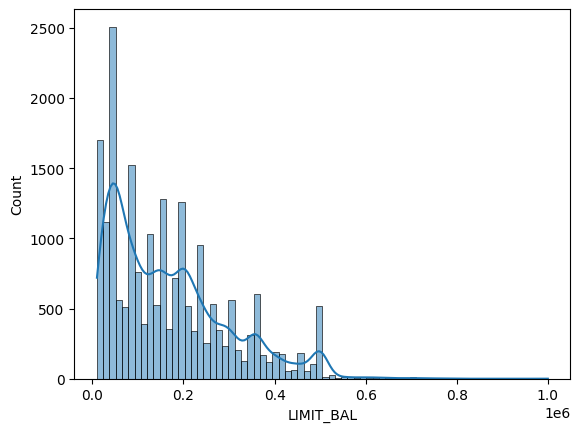

In [8]:
import seaborn as sns
sns.histplot(df_train.LIMIT_BAL,kde=True)

<Axes: xlabel='INSTALLMENT_3'>

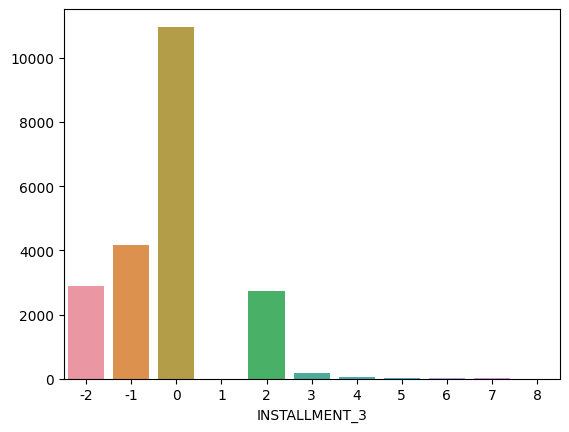

In [9]:
sns.barplot(x=((df_train.INSTALLMENT_3).value_counts()).index,y=((df_train.INSTALLMENT_3).value_counts()).values)

In [10]:
import seaborn as sns
# sns.histplot(df_train.AGE)

In [11]:
df_train.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARITAL_STATUS', 'AGE',
       'INSTALLMENT_1', 'INSTALLMENT_2', 'INSTALLMENT_3', 'INSTALLMENT_AMT_1',
       'INSTALLMENT_AMT_2', 'INSTALLMENT_AMT_3', 'INSTALLMENT_PAID_1',
       'INSTALLMENT_PAID_2', 'INSTALLMENT_PAID_3',
       'DEFAULT.PAYMENT.NEXT.MONTH'],
      dtype='object')

In [12]:
# sns.scatterplot(x=df['LIMIT_BAL'], y=df['DEFAULT.PAYMENT.NEXT.MONTH'],hue=df['DEFAULT.PAYMENT.NEXT.MONTH'])

# # Add labels and title
# plt.xlabel('X-axis Label')
# plt.ylabel('Y-axis Label')
# plt.title('Scatter Plot')
# # Show plot
# plt.show()

In [13]:
df_train['MARITAL_STATUS'].value_counts()

MARITAL_STATUS
SINGLE     11117
MARRIED     9624
3            221
0             38
Name: count, dtype: int64

In [14]:
df_train.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARITAL_STATUS', 'AGE',
       'INSTALLMENT_1', 'INSTALLMENT_2', 'INSTALLMENT_3', 'INSTALLMENT_AMT_1',
       'INSTALLMENT_AMT_2', 'INSTALLMENT_AMT_3', 'INSTALLMENT_PAID_1',
       'INSTALLMENT_PAID_2', 'INSTALLMENT_PAID_3',
       'DEFAULT.PAYMENT.NEXT.MONTH'],
      dtype='object')

In [15]:
def mapping(df,col):
    total_counts=df[col].count()
    count=df[col].value_counts()
    df[col]=df[col].map(lambda x:count[x]/total_counts)

In [16]:
mapping(df_train,'EDUCATION')
mapping(df_train,'MARITAL_STATUS')
mapping(df_test,'EDUCATION')
mapping(df_test,'MARITAL_STATUS')
sex_mapping = {'MALE': 0, 'FEMALE': 1}
df_train['SEX'] = df_train['SEX'].map(sex_mapping)
df_test['SEX'] = df_test['SEX'].map(sex_mapping)

In [17]:
y=df_train['DEFAULT.PAYMENT.NEXT.MONTH']

In [18]:
x = df_train.drop(['DEFAULT.PAYMENT.NEXT.MONTH', 'ID'], axis=1)
x_test = df_test.drop(['ID'], axis=1)
x_test_id=df_test['ID']

In [19]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr 
corr_features=correlation(x,0.8)
corr_features

{'INSTALLMENT_AMT_2', 'INSTALLMENT_AMT_3'}

In [20]:
df_train.corr()

,ID,LIMIT_BAL,SEX,EDUCATION,MARITAL_STATUS,AGE,INSTALLMENT_1,INSTALLMENT_2,INSTALLMENT_3,INSTALLMENT_AMT_1,INSTALLMENT_AMT_2,INSTALLMENT_AMT_3,INSTALLMENT_PAID_1,INSTALLMENT_PAID_2,INSTALLMENT_PAID_3,DEFAULT.PAYMENT.NEXT.MONTH
ID,1.000000,0.030882,0.017310,-0.018457,-0.003259,0.020646,-0.029854,-0.013397,-0.019416,0.022959,0.020745,0.027265,0.008732,0.012594,0.041182,-0.012688
LIMIT_BAL,0.030882,1.000000,0.020620,0.018282,-0.005406,0.142039,-0.267815,-0.296213,-0.282098,0.288336,0.281627,0.285195,0.192309,0.170236,0.210561,-0.153307
SEX,0.017310,0.020620,1.000000,0.018771,-0.010993,-0.096376,-0.057031,-0.071448,-0.063755,-0.032446,-0.029453,-0.023916,0.000385,-0.001963,-0.007604,-0.043566
EDUCATION,-0.018457,0.018282,0.018771,1.000000,0.057552,-0.176046,0.021052,0.029110,0.028544,0.011804,0.013168,0.010793,-0.006120,-0.011516,-0.006685,0.012303
MARITAL_STATUS,-0.003259,-0.005406,-0.010993,0.057552,1.000000,-0.313919,-0.005791,0.001458,0.003487,0.001952,0.003836,0.004326,-0.018365,-0.018641,-0.011045,-0.026543
AGE,0.020646,0.142039,-0.096376,-0.176046,-0.313919,1.000000,-0.035528,-0.046491,-0.050644,0.059023,0.058253,0.057631,0.030873,0.022093,0.027864,0.019325
INSTALLMENT_1,-0.029854,-0.267815,-0.057031,0.021052,-0.005791,-0.035528,1.000000,0.672848,0.576555,0.182146,0.185251,0.174273,-0.080879,-0.069054,-0.072779,0.327324
INSTALLMENT_2,-0.013397,-0.296213,-0.071448,0.029110,0.001458,-0.046491,0.672848,1.000000,0.765752,0.228361,0.228983,0.217989,-0.080802,-0.054108,-0.057551,0.268798
INSTALLMENT_3,-0.019416,-0.282098,-0.063755,0.028544,0.003487,-0.050644,0.576555,0.765752,1.000000,0.203930,0.232312,0.222114,-0.001033,-0.061449,-0.051478,0.238957
INSTALLMENT_AMT_1,0.022959,0.288336,-0.032446,0.011804,0.001952,0.059023,0.182146,0.228361,0.203930,1.000000,0.949794,0.886713,0.136435,0.094567,0.151929,-0.018620


In [21]:
x=x.drop(corr_features,axis=1)
x_test=x_test.drop(corr_features,axis=1)

In [22]:
x_test

,LIMIT_BAL,SEX,EDUCATION,MARITAL_STATUS,AGE,INSTALLMENT_1,INSTALLMENT_2,INSTALLMENT_3,INSTALLMENT_AMT_1,INSTALLMENT_PAID_1,INSTALLMENT_PAID_2,INSTALLMENT_PAID_3
0,150000.0,0,0.475444,0.448333,36,2,2,0,88655.0,0.0,4000.0,5000.0
1,50000.0,0,0.475444,0.538556,33,0,0,0,8406.0,3000.0,3000.0,7508.0
2,30000.0,1,0.344444,0.538556,28,0,0,0,36541.0,5000.0,11000.0,3000.0
3,200000.0,0,0.344444,0.538556,31,1,2,2,182307.0,8300.0,15900.0,200.0
4,500000.0,1,0.344444,0.448333,45,-1,-1,-1,36954.0,0.0,83000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8995,20000.0,0,0.475444,0.448333,31,0,0,0,18490.0,1500.0,2393.0,1000.0
8996,60000.0,0,0.164889,0.538556,46,0,0,0,61548.0,2700.0,1500.0,2000.0
8997,70000.0,0,0.164889,0.448333,56,0,0,0,42039.0,5000.0,2238.0,3000.0
8998,80000.0,1,0.475444,0.538556,24,0,0,0,19188.0,1374.0,1235.0,1101.0


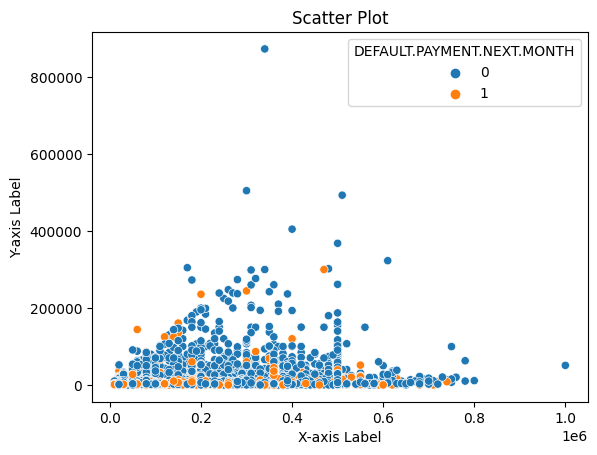

In [23]:
sns.scatterplot(x=df_train['LIMIT_BAL'], y=df_train['INSTALLMENT_PAID_1'],hue=df_train['DEFAULT.PAYMENT.NEXT.MONTH'])

# Add labels and title
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Scatter Plot')
# Show plot
plt.show()

In [24]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(random_state=2)
X_re, y_re = oversampler.fit_resample(x, y)

In [25]:
X_re

,LIMIT_BAL,SEX,EDUCATION,MARITAL_STATUS,AGE,INSTALLMENT_1,INSTALLMENT_2,INSTALLMENT_3,INSTALLMENT_AMT_1,INSTALLMENT_PAID_1,INSTALLMENT_PAID_2,INSTALLMENT_PAID_3
0,220000.0,1,0.356429,0.458286,54,1,-2,-1,0.0,0.0,788.0,0.0
1,90000.0,1,0.356429,0.529381,30,2,2,3,750.0,0.0,0.0,0.0
2,80000.0,1,0.464333,0.529381,25,2,3,2,69602.0,0.0,6000.0,2700.0
3,260000.0,1,0.163476,0.458286,53,1,-1,-1,0.0,165.0,526.0,452.0
4,30000.0,1,0.464333,0.529381,23,0,0,0,25287.0,2011.0,5000.0,868.0
...,...,...,...,...,...,...,...,...,...,...,...,...
32611,200000.0,0,0.163476,0.458286,36,-1,2,-1,1762.0,4.0,24846.0,5004.0
32612,100000.0,0,0.163476,0.458286,54,2,2,2,81507.0,3900.0,7300.0,0.0
32613,110000.0,1,0.356429,0.529381,32,1,-2,-2,0.0,0.0,0.0,0.0
32614,230000.0,0,0.464333,0.529381,32,2,0,0,253935.0,10183.0,10057.0,19000.0


In [26]:
#X_scaled_train.shape

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
# accuracy_score(y_test,pred1)

In [28]:
#df_plot = pd.DataFrame({'y_pred': y_pred, 'SEX': X_test['SEX']})

In [29]:
#sns.countplot(x='SEX', hue='y_pred', data=df_plot, palette='Set2')

In [30]:
pip install fairlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.1/234.1 kB 2.0 MB/s eta 0:00:00a 0:00:01m
Note: you may need to restart the kernel to use updated packages.


In [31]:
from fairlearn.postprocessing import ThresholdOptimizer, plot_threshold_optimizer
from fairlearn.metrics import demographic_parity_ratio, equalized_odds_ratio
from fairlearn.reductions import DemographicParity

In [32]:
(X_train, X_test, y_train, y_test, A_train, A_test) = train_test_split(
    X_re, y_re, X_re['SEX'], test_size=0.15, random_state=2
)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
A_train = A_train.reset_index(drop=True)
A_test = A_test.reset_index(drop=True)

In [33]:
A_train

0        1
1        1
2        0
3        1
4        0
        ..
27718    0
27719    1
27720    0
27721    1
27722    1
Name: SEX, Length: 27723, dtype: int64

In [34]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from catboost import CatBoostClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

cat_classifier = CatBoostClassifier(iterations=100, random_state=2, verbose=False)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=2, max_depth=5)
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=2)
ada_classifier = AdaBoostClassifier(n_estimators=100, random_state=2)

classifiers = [('CatBoost', cat_classifier),
               ('Random Forest', rf_classifier),
               ('Gradient Boosting', gb_classifier),
               ('AdaBoost', ada_classifier)]

clf = VotingClassifier(estimators=classifiers, voting='soft')

2024-04-01 00:50:06.804490: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-01 00:50:06.804623: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-01 00:50:06.974051: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [35]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # StandardScaler for feature scaling
    ('model', clf)  # Your model (clf)
])

In [36]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 VotingClassifier(estimators=[('CatBoost',
                                               <catboost.core.CatBoostClassifier object at 0x7e86dafc7c40>),
                                              ('Random Forest',
                                               RandomForestClassifier(max_depth=5,
                                                                      random_state=2)),
                                              ('Gradient Boosting',
                                               GradientBoostingClassifier(random_state=2)),
                                              ('AdaBoost',
                                               AdaBoostClassifier(n_estimators=100,
                                                                  random_state=2))],
                                  voting='soft'))])

In [37]:
y_pred = pipeline.predict(X_test)

In [38]:
accuracy_female = accuracy_score(y_test[X_test['SEX'] == 1], y_pred[X_test['SEX'] == 1])
accuracy_male = accuracy_score(y_test[X_test['SEX'] == 0], y_pred[X_test['SEX'] == 0])
print(abs(accuracy_female-accuracy_male))

0.03146189309097469


In [39]:
m_dpr = demographic_parity_ratio(y_test, y_pred, sensitive_features=A_test)
m_eqo = equalized_odds_ratio(y_test, y_pred, sensitive_features=A_test)

In [40]:
print(m_dpr)
print(m_eqo)

0.8893827824271043
0.7854598445595855


In [41]:
threshold_optimizer = ThresholdOptimizer(
    estimator=pipeline,
    constraints="demographic_parity",
    predict_method="predict_proba",
    prefit=False,
)

In [42]:
threshold_optimizer.fit(X_train, y_train, sensitive_features=A_train)

ThresholdOptimizer(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('model',
                                              VotingClassifier(estimators=[('CatBoost',
                                                                            <catboost.core.CatBoostClassifier object at 0x7e86dafc7c40>),
                                                                           ('Random '
                                                                            'Forest',
                                                                            RandomForestClassifier(max_depth=5,
                                                                                                   random_state=2)),
                                                                           ('Gradient '
                                                                            'Boosting',
                                                                            GradientBoostingClassifier(random_state=2)),
                                                                           ('AdaBoost',
                                                                            AdaBoostClassifier(n_estimators=100,
                                                                                               random_state=2))],
                                                               voting='soft'))]),
                   predict_method='predict_proba')

{
    "0": {
        "p0": 0.04168131868132103,
        "operation0": "[>0.4785086368802888]",
        "p1": 0.9583186813186789,
        "operation1": "[>0.47501537534678806]"
    },
    "1": {
        "p0": 0.7605995934959345,
        "operation0": "[>0.4495244747146866]",
        "p1": 0.23940040650406547,
        "operation1": "[>0.4232468572398529]"
    }
}


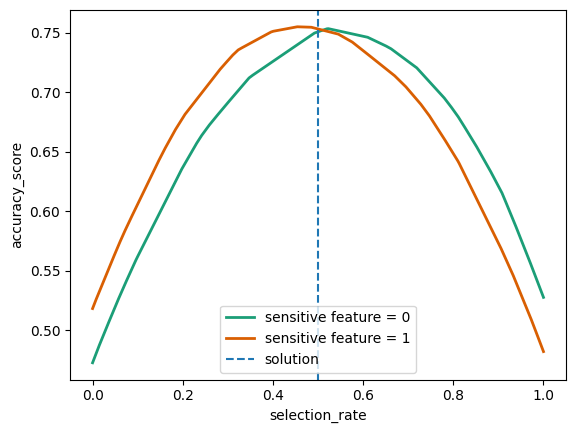

In [43]:
import json
y_pred_opt = threshold_optimizer.predict(X_test, sensitive_features=A_test)

print(
    json.dumps(
        threshold_optimizer.interpolated_thresholder_.interpolation_dict,
        default=str,
        indent=4,
    )
)

plot_threshold_optimizer(threshold_optimizer) 

In [44]:
m_dpr_opt = demographic_parity_ratio(y_test, y_pred_opt, sensitive_features=A_test)
m_eqo_opt = equalized_odds_ratio(y_test, y_pred_opt, sensitive_features=A_test)
print(f'Value of demographic parity ratio (after post-processing): {round(m_dpr_opt, 2)}')
print(f'Value of equal odds ratio (after post-processing): {round(m_eqo_opt, 2)}') 

Value of demographic parity ratio (after post-processing): 0.98
Value of equal odds ratio (after post-processing): 0.93


In [45]:
print(classification_report(y_pred_opt,y_test))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      2463
           1       0.74      0.74      0.74      2430

    accuracy                           0.74      4893
   macro avg       0.74      0.74      0.74      4893
weighted avg       0.74      0.74      0.74      4893



In [46]:
x_test

,LIMIT_BAL,SEX,EDUCATION,MARITAL_STATUS,AGE,INSTALLMENT_1,INSTALLMENT_2,INSTALLMENT_3,INSTALLMENT_AMT_1,INSTALLMENT_PAID_1,INSTALLMENT_PAID_2,INSTALLMENT_PAID_3
0,150000.0,0,0.475444,0.448333,36,2,2,0,88655.0,0.0,4000.0,5000.0
1,50000.0,0,0.475444,0.538556,33,0,0,0,8406.0,3000.0,3000.0,7508.0
2,30000.0,1,0.344444,0.538556,28,0,0,0,36541.0,5000.0,11000.0,3000.0
3,200000.0,0,0.344444,0.538556,31,1,2,2,182307.0,8300.0,15900.0,200.0
4,500000.0,1,0.344444,0.448333,45,-1,-1,-1,36954.0,0.0,83000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8995,20000.0,0,0.475444,0.448333,31,0,0,0,18490.0,1500.0,2393.0,1000.0
8996,60000.0,0,0.164889,0.538556,46,0,0,0,61548.0,2700.0,1500.0,2000.0
8997,70000.0,0,0.164889,0.448333,56,0,0,0,42039.0,5000.0,2238.0,3000.0
8998,80000.0,1,0.475444,0.538556,24,0,0,0,19188.0,1374.0,1235.0,1101.0


In [47]:
#X_scaled_test_sub=
y_pred_d=threshold_optimizer.predict(x_test,sensitive_features=x_test['SEX'])

In [48]:
results_df = pd.DataFrame({'ID': x_test_id, 'DEFAULT.PAYMENT.NEXT.MONTH': y_pred_d})

# Save the results to a CSV file
results_df.to_csv('submission.csv', index=False)
results_df

,ID,DEFAULT.PAYMENT.NEXT.MONTH
0,16691,1
1,15039,0
2,7736,0
3,20871,1
4,1651,0
...,...,...
8995,11671,0
8996,29527,0
8997,9016,0
8998,28520,0


In [49]:
results_df['DEFAULT.PAYMENT.NEXT.MONTH'].value_counts()

DEFAULT.PAYMENT.NEXT.MONTH
0    5894
1    3106
Name: count, dtype: int64

In [50]:
# classifiers = {
# #     "Logistic Regression": LogisticRegression(),
# #     "Decision Tree": DecisionTreeClassifier(),
#     "Random Forest": RandomForestClassifier(),
#     "Support Vector Machine": SVC()
# }

# # Train and evaluate each classifier
# for name, classifier in classifiers.items():
#     classifier.fit(X_scaled_train, y_train)
#     y_pred_23 = classifier.predict(X_scaled_test)
#     accuracy = accuracy_score(y_test, y_pred_23)
#     print(f"{name} Accuracy: {accuracy:.2f}")